## Challenge: model comparison

Find a data set and build a KNN Regression and an OLS regression. Compare the two. 

- How similar are they? 
- Do they miss in different ways?

At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

### Loading dataset

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the [reference](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score


from sklearn.model_selection  import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

from sklearn.preprocessing import normalize

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import neighbors
# Reading from a csv file
beer = pd.read_csv('beer_consumption.csv')

# Iterating the columns and removing whitespaces
for col in beer.columns:
    beer.rename(columns={col:col.replace(" ", "_")},inplace=True)

beer.head(10)

,Data,Temperatura_Media_(C),Temperatura_Minima_(C),Temperatura_Maxima_(C),Precipitacao_(mm),Final_de_Semana,Consumo_de_cerveja_(litros)
0,1/1/15,27.30,23.9,32.5,0.0,0,25.461
1,1/2/15,27.02,24.5,33.5,0.0,0,28.972
2,1/3/15,24.82,22.4,29.9,0.0,1,30.814
3,1/4/15,23.98,21.5,28.6,1.2,1,29.799
4,1/5/15,23.82,21.0,28.3,0.0,0,28.900
5,1/6/15,23.78,20.1,30.5,12.2,0,28.218
6,1/7/15,24.00,19.5,33.7,0.0,0,29.732
7,1/8/15,24.90,19.5,32.8,48.6,0,28.397
8,1/9/15,28.20,21.9,34.0,4.4,0,24.886
9,1/10/15,26.76,22.1,34.2,0.0,1,37.937


### Data cleaning, exploratory data analysis, and feature engineering

In [53]:
#Looking for features with higher correlation with Price

correlation = beer.corr()
cor_target = abs(correlation['Consumo_de_cerveja_(litros)'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

Consumo_de_cerveja_(litros)    1.000000
Temperatura_Maxima_(C)         0.642672
Temperatura_Media_(C)          0.574615
Final_de_Semana                0.505981
Name: Consumo_de_cerveja_(litros), dtype: float64

All null values are in yellow


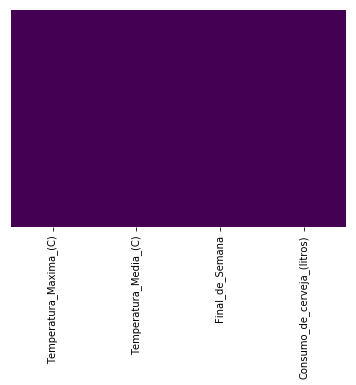

In [54]:
#Searching missing values

print('All null values are in yellow')
sns.heatmap(beer[['Temperatura_Maxima_(C)','Temperatura_Media_(C)','Final_de_Semana','Consumo_de_cerveja_(litros)']].isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Creating X and Y

In [56]:
#Creating a interaction feature with two related variables

#Creating feature set for X
X = beer[['Temperatura_Maxima_(C)','Temperatura_Media_(C)','Final_de_Semana']]

# Y is the target variable
Y = beer['Consumo_de_cerveja_(litros)']

#split  data into train and test sets where 20% of the data resides in the test set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=101)

### Build OLS Regression Model

In [58]:
#Model 1 - OLS

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_test = lrm.predict(X_test)
accuracy=cross_val_score(lrm, X_train, y_train, cv=10)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), accuracy.std() * 2))

R-squared of the model in the training set is: 0.6623793376785037
-----Test set statistics-----
R-squared of the model in the test set is: 0.75619520406491
Mean absolute error of the prediction is: 2.0140929507885623
Mean squared error of the prediction is: 5.612315584607889
Root mean squared error of the prediction is: 2.3690326263282846
Mean absolute percentage error of the prediction is: 8.12973847624917
Accuracy: 0.613 (+/- 0.212)


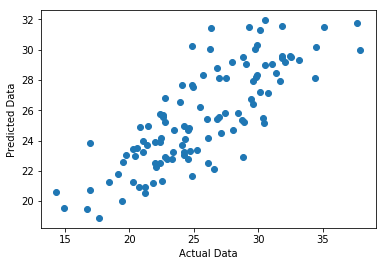

In [86]:
plt.scatter(y_test,y_preds_test)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

### Build KNN Regression Model

####  Let's  look at the error rate for different k values

In [87]:

for K in range(25):
    K = K+1
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=K, weights='distance')
    knn_w.fit(X_train,y_train)

    y_preds_test = knn_w.predict(X_test)
    accuracy=cross_val_score(knn_w, X_train, y_train, cv=10)

    print("K is {} and RMSE of the prediction is: {}".format(K,round(rmse(y_test, y_preds_test),6)))
    print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), accuracy.std() * 2))


K is 1 and RMSE of the prediction is: 3.687804
Accuracy: 0.189 (+/- 0.644)
K is 2 and RMSE of the prediction is: 3.28516
Accuracy: 0.347 (+/- 0.530)
K is 3 and RMSE of the prediction is: 3.115203
Accuracy: 0.413 (+/- 0.482)
K is 4 and RMSE of the prediction is: 3.045506
Accuracy: 0.431 (+/- 0.471)
K is 5 and RMSE of the prediction is: 2.926425
Accuracy: 0.443 (+/- 0.448)
K is 6 and RMSE of the prediction is: 2.924243
Accuracy: 0.475 (+/- 0.411)
K is 7 and RMSE of the prediction is: 2.880195
Accuracy: 0.478 (+/- 0.395)
K is 8 and RMSE of the prediction is: 2.932084
Accuracy: 0.480 (+/- 0.375)
K is 9 and RMSE of the prediction is: 2.910097
Accuracy: 0.494 (+/- 0.326)
K is 10 and RMSE of the prediction is: 2.930809
Accuracy: 0.486 (+/- 0.307)
K is 11 and RMSE of the prediction is: 2.958879
Accuracy: 0.476 (+/- 0.283)
K is 12 and RMSE of the prediction is: 2.964472
Accuracy: 0.478 (+/- 0.282)
K is 13 and RMSE of the prediction is: 2.979377
Accuracy: 0.467 (+/- 0.296)
K is 14 and RMSE of th

#### Based on numers above, at k= 9, the RMSE is approximately 2.91 and accuracy is the highest value 0.494. I can safely say that k=9 will give the best result in this case

In [88]:
# Run the model

knn_w = neighbors.KNeighborsRegressor(n_neighbors=9, weights='distance')
knn_w.fit(X_train, y_train)

# We are making predictions here
y_preds_test = knn_w.predict(X_test)

#Calculating accuracy
accuracy=cross_val_score(knn_w, X_train, y_train, cv=10)


print("R-squared of the model in the training set is: {}".format(knn_w.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(knn_w.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracy.mean(), accuracy.std() * 2))


R-squared of the model in the training set is: 1.0
-----Test set statistics-----
R-squared of the model in the test set is: 0.6321124985240255
Mean absolute error of the prediction is: 2.3811195030647228
Mean squared error of the prediction is: 8.468663423937608
Root mean squared error of the prediction is: 2.910096806626475
Mean absolute percentage error of the prediction is: 9.590900222610601
Accuracy: 0.494 (+/- 0.326)
